# t-sne Visualizer

- Pull in vectors of studies
- t-sne plot

### Choose Experiment Group & ID

In [15]:
exp_group = 'little-k'
exp_id = 8

### Load Study Vectors

In [17]:
X = pickle.load(open('store/study_vecs/{}/{}.p'.format(exp_group, exp_id))).astype('float64')

X.shape

(2034, 999)

### Load Corresponding `CDNO`s

In [18]:
top_k = pd.Series.from_csv('store/hyperparams/{}/{}.csv'.format(exp_group, exp_id))['top-k']
top_k = int(top_k)

top_k

{'CD000259',
 'CD000978',
 'CD001181',
 'CD001886',
 'CD002967',
 'CD003974',
 'CD004022',
 'CD004125',
 'CD007146',
 'CD008226'}

In [22]:
df = pd.read_csv('../preprocess/pico_cdsr.csv', index_col=0)
top_cdnos = set(df.groupby('cdno').size().sort_values(ascending=False).index[:top_k])
df = df[df.cdno.map(lambda cdno: cdno in top_cdnos)] # throw out studies we are not using
train_idxs = np.array(df.index) # get study indices so we can index into vectorized data
cdnos = df.reset_index(drop=True).cdno # get cdnos so we can map studies to their cdno

top_cdnos

{'CD000259',
 'CD000978',
 'CD001181',
 'CD001886',
 'CD002967',
 'CD003974',
 'CD004022',
 'CD004125',
 'CD007146',
 'CD008226'}

Randomly pick out the studies from `nb_review` reviews and plot them.

In [23]:
nb_review = 8
small_cdno_set = np.random.choice(list(top_cdnos), size=nb_review, replace=False)
tsne_mask = cdnos.map(lambda cdno: cdno in small_cdno_set)
X_tsne, cdnos_tsne = X[np.array(tsne_mask)], cdnos[tsne_mask]

### t-sne plot

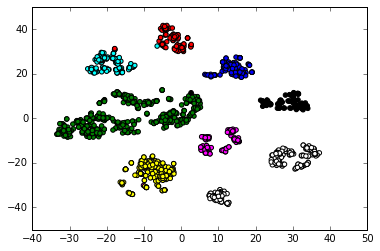

In [24]:
from tsne import bh_sne

X_tsne = bh_sne(X_tsne)

colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'white']
cmap = {cdno: color for cdno, color in zip(small_cdno_set, colors[:nb_review])}
plt.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], c=cdnos_tsne.map(cmap))